<a href="https://colab.research.google.com/github/DhanvinS/Projects/blob/main/Data%20analysis%201/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
**DISCLAIMER: This is a fake story, not a real incident! We have created this story just for the data exploration purpose.**

---
---

**Campus Police Department**

Incident Report

---

**Incident Date:** September 10, 2025

**Location of Incident:** 2nd Floor, Iribe Building

**Items Left at the Scene:** Red Ticket for Zichao's Magic Show

**Case Number:** 2025-IRB-0027

---
**Victim Information:**

**Name:** Dr. Fardina Alam

**Affiliation:** University of Maryland, College Park

**Position:** Professor

---

**Incident Description:**

On the evening of September 10, 2025, an unknown individual(s) unlawfully entered Dr. Fardina's office located on the 2nd floor of Iribe and stole a set of markers. The stolen items were a set of limited edition markers that Dr. Fardina had spent years collecting. A red entry ticket for "Zichao's Magic Show" was found on the floor near Dr. Fardina's desk.







In [156]:
# We import all the essential libraries for this assignment; if you want to add additional libraries, you can add more here!
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

## Instructions:

 you are tasked with solving the mystery of Dr. Fardina's stolen markers and finding the culprit.

To accomplish this, you will be provided with **4 data sets** containing key information related to the incident. The filenames are:

 - Profiles
 - Witnesses
 - Zichao's magic show
 - Interrogation Statements



Your goal is to analyze these datasets to uncover the clues and evidence that will lead you to the thief.

Take a moment to look at the dataset documentation below:

---

**Profiles:**

This dataset contains information regarding all the potential people that could have committed the crime. The columns are as follows:
- **ID:** A **unique** identifier for each person
- **Name:** The name of the person
- **Birthday:** The birthday of the person
- **Location_during_crime:** The location of the person during the crime
- **Eye_Color:** The eye color of the person
- **Skin_Color:** The skin color of the person
- **Hair_Color:** The hair color of the person
- **Height:** The height of the person in cm

**Witnesses:**

This dataset contains a statement from everyone in **Profiles** about suspicious things they saw during the time of the crime. The columns are as follows:
- **ID:** A **unique** identifier for each person that matches the **Profiles** **ID** column.
- **Statement:** A statement from the person regarding a suspicious activity during the time of the crime (text!).

**Zichao's magic show:**

This dataset contains everyone that purchased a ticket for the show. **NOTE** that not everyone in **Profiles** has purchased a ticket for this show. The columns are as follows:
- **ID:** A **unique** identifier for each person
- **Ticket_Number:** A **unique** number identifying a specific sale.

**Interrogation Statements:**

This dataset would give you the statement from someone you wish to interrogate. You will zero in on one suspect over the course of the assignment and look up that person's statement in this table. Assume that each statement is 100% true. The columns are as follows:

- **Name:** The name of the person being interrogated
- **Statement:** A statement the person gives after being interrogated (text!)

---

In [157]:
# importing required stuff and using files to import Profiles.csv
from google.colab import files
files.upload()

Saving Profiles.csv to Profiles (1).csv


{'Profiles (1).csv': b'ID,Name,Birthday,Location_during_crime,Eye_Color,Skin_Color,Hair_Color,Height\r\nP299,James Mason,1968/07/10,fourth floor,red,indigo,orange,191\r\nP086,Christopher Rodriguez,1978/03/10,second floor,indigo,indigo,green,198\r\nP022,Misty Ashley,1989/10/08,fourth floor,blue,red,violet,154\r\nP003,Amanda Brown,1995/27/10,lobby,green,blue,violet,158\r\nP036,William Jones,1990/26/02,fourth floor,blue,yellow,orange,184\r\nP158,Karen Roberts,05/11/1981,,,yellow,blue,172\r\nP129,Calvin Powers,1999/22/06,fourth floor,indigo,blue,orange,199\r\nP181,Kaitlin Higgins PhD,07/22/1963,third floor,,violet,violet,196\r\nP136,Jodi Mccarty,1987/22/07,,orange,orange,red,198\r\nP157,Ronald Jackson,1973/23/04,second floor,blue,red,red,200\r\nP209,Alan Banks,1996/08/02,lobby,green,green,orange,186\r\nP160,Joshua Diaz,1959/09/04,second floor,yellow,green,red,161\r\nP037,Julie Adams,1993/17/08,,blue,red,orange,183\r\nP264,Bryan Stewart,1961/09/04,third floor,orange,yellow,indigo,176\r\nP07

In [158]:
# assigning profile_df to the dataset we imported
# using .head() to display the first 5 rows
profiles_df = pd.read_csv('Profiles.csv')
profiles_df

,ID,Name,Birthday,Location_during_crime,Eye_Color,Skin_Color,Hair_Color,Height
0,P299,James Mason,1968/07/10,fourth floor,red,indigo,orange,191
1,P086,Christopher Rodriguez,1978/03/10,second floor,indigo,indigo,green,198
2,P022,Misty Ashley,1989/10/08,fourth floor,blue,red,violet,154
3,P003,Amanda Brown,1995/27/10,lobby,green,blue,violet,158
4,P036,William Jones,1990/26/02,fourth floor,blue,yellow,orange,184
...,...,...,...,...,...,...,...,...
343,P126,Kenneth Watson,1987/03/01,NaN,violet,indigo,red,176
344,P203,Donald Anderson,1964/26/09,third floor,yellow,indigo,orange,193
345,P273,Harold Watkins,2002/12/07,fourth floor,blue,indigo,red,193
346,P290,Brandon Bennett,10/03/1993,third floor,NaN,yellow,indigo,161


In [159]:
# displaying number of coulmns and rows (rows, columns)
profiles_df.shape
# rows = 348 , columns - 8

(348, 8)

In [160]:
# Displaying the names of all the columns
profiles_df.columns

Index(['ID', 'Name', 'Birthday', 'Location_during_crime', 'Eye_Color',
       'Skin_Color', 'Hair_Color', 'Height'],
      dtype='object')

In [161]:
# using dtypes to display the datatypes
profiles_df.dtypes

,0
ID,object
Name,object
Birthday,object
Location_during_crime,object
Eye_Color,object
Skin_Color,object
Hair_Color,object
Height,int64


In [162]:
info = profiles_df.count()
info

,0
ID,348
Name,348
Birthday,348
Location_during_crime,280
Eye_Color,280
Skin_Color,348
Hair_Color,348
Height,348




The columns Location_during_crime and Eye_color have missing data  
They have 68 rows missing  
This may cause issues with our analysis




In [163]:
# this displays the number of duplicate values in the dataframe
profiles_df.duplicated(subset=["ID"]).sum()

np.int64(48)

In [164]:
# Used the same for seeing if names also has the same number of duplicate values
profiles_df.duplicated(subset=["Name"]).sum()

np.int64(49)

In [165]:
# used .describe() to see a summary of the dataset
profiles_df.describe()

,Height
count,348.000000
mean,175.425287
std,15.539951
min,150.000000
25%,161.000000
50%,175.000000
75%,190.000000
max,200.000000


In [166]:
# here I displayed all the unique values of the birthday column
profiles_df['Birthday'].unique()

array(['1968/07/10', '1978/03/10', '1989/10/08', '1995/27/10',
       '1990/26/02', '05/11/1981', '1999/22/06', '07/22/1963',
       '1987/22/07', '1973/23/04', '1996/08/02', '1959/09/04',
       '1993/17/08', '1961/09/04', '1974/17/05', '1989/08/08',
       '01/04/1986', '1984/01/03', '06/24/2004', '11/01/1961',
       '05/19/1991', '2006/21/02', '1984/07/11', '03/03/2005',
       '1960/20/10', '1986/27/10', '05/16/1959', '2001/03/02',
       '1966/31/08', '1994/16/05', '1983/24/03', '2004/12/05',
       '04/13/1969', '1978/31/10', '1973/22/02', '1989/17/03',
       '1968/23/07', '1979/08/09', '07/02/1993', '1990/07/12',
       '10/01/1979', '04/21/1986', '2003/02/04', '1962/18/08',
       '1994/18/10', '1990/03/04', '07/01/2005', '01/13/1976',
       '1968/22/08', '1995/17/07', '2003/25/11', '1976/22/07',
       '02/27/1968', '1977/29/08', '09/28/1962', '2000/13/08',
       '06/22/1978', '1984/25/01', '04/23/1984', '1970/26/06',
       '11/07/1999', '1970/27/11', '1994/28/09', '1992/


I used .duplicated to get the number of duplicate entries if any it turned out to be 48     

This can cause a signicant issue for our analysis  

The Birthday columns have inconsistent data formats with year month date in different orders in each row  
 This inconsistency makes it difficult to reliably extract or process birthdays.


## 2. Cleaning the data set

 Lets begin by fixing the Birthday column.

- Pandas internally represents dates in 'datetime64' format which is a form of ISO 8601. Basically, dates are represented as yyyy-mm-dd.


- Fix all the dates in the Birthday Column to be consistent with yyyy-mm-dd.
- Display the "Profiles" dataframe after you are done.

Note that the only 2 formats the dates are in are yyyy/dd/mm or mm/dd/yyyy, and you want to represent both as yyyy-mm-dd.





In [167]:
def fix_bdays(date_str):
    if pd.isna(date_str):
        return date_str
    parts = str(date_str).split('/')
    if len(parts) == 3:
        if len(parts[0]) == 4:
            year, day, month = parts
        else:
            month, day, year = parts
        return f'{year.zfill(4)}-{month.zfill(2)}-{day.zfill(2)}'
    return date_str

'''The function fix_bdays takes a date string as input and splits it by
the slash ("/") character into three parts. It then checks the length of
the first part to determine the format: if the first part has four characters,
it assumes the format is yyyy/dd/mm, otherwise it treats it as mm/dd/yyyy.
It rearranges the parts accordingly into the standard ISO
format yyyy-mm-dd by zero-padding the year, month, and day
components to ensure consistent width. If the input does not match
the expected format, it returns the original string unchanged.
This function is then applied to each date in the "Birthday" column
to standardize differing date formats into one uniform string format
before converting the entire column to a pandas datetime type for
further usage.'''

'The function fix_bdays takes a date string as input and splits it by\nthe slash ("/") character into three parts. It then checks the length of\nthe first part to determine the format: if the first part has four characters,\nit assumes the format is yyyy/dd/mm, otherwise it treats it as mm/dd/yyyy.\nIt rearranges the parts accordingly into the standard ISO\nformat yyyy-mm-dd by zero-padding the year, month, and day\ncomponents to ensure consistent width. If the input does not match\nthe expected format, it returns the original string unchanged.\nThis function is then applied to each date in the "Birthday" column\nto standardize differing date formats into one uniform string format\nbefore converting the entire column to a pandas datetime type for\nfurther usage.'

In [168]:
profiles_df['Birthday'] = profiles_df['Birthday'].apply(fix_bdays)
profiles_df['Birthday'] = pd.to_datetime(profiles_df['Birthday'], errors='coerce')
profiles_df
#transforming date strings into a standardized format.
#It then converts these cleaned strings into pandas datetime objects for reliable date handling

,ID,Name,Birthday,Location_during_crime,Eye_Color,Skin_Color,Hair_Color,Height
0,P299,James Mason,1968-10-07,fourth floor,red,indigo,orange,191
1,P086,Christopher Rodriguez,1978-10-03,second floor,indigo,indigo,green,198
2,P022,Misty Ashley,1989-08-10,fourth floor,blue,red,violet,154
3,P003,Amanda Brown,1995-10-27,lobby,green,blue,violet,158
4,P036,William Jones,1990-02-26,fourth floor,blue,yellow,orange,184
...,...,...,...,...,...,...,...,...
343,P126,Kenneth Watson,1987-01-03,NaN,violet,indigo,red,176
344,P203,Donald Anderson,1964-09-26,third floor,yellow,indigo,orange,193
345,P273,Harold Watkins,2002-07-12,fourth floor,blue,indigo,red,193
346,P290,Brandon Bennett,1993-10-03,third floor,NaN,yellow,indigo,161


In [169]:
from datetime import datetime

# This calculates the age for each row using their cleaned "Birthday" value,
# making sure only whole years are counted by checking if the birthday has
# occurred yet that year.

crime_date = pd.Timestamp('2025-09-10')

profiles_df['Age'] = profiles_df['Birthday'].apply(
    lambda bday: crime_date.year - bday.year - ((crime_date.month, crime_date.day)<(bday.month, bday.day))
    )
profiles_df

,ID,Name,Birthday,Location_during_crime,Eye_Color,Skin_Color,Hair_Color,Height,Age
0,P299,James Mason,1968-10-07,fourth floor,red,indigo,orange,191,56
1,P086,Christopher Rodriguez,1978-10-03,second floor,indigo,indigo,green,198,46
2,P022,Misty Ashley,1989-08-10,fourth floor,blue,red,violet,154,36
3,P003,Amanda Brown,1995-10-27,lobby,green,blue,violet,158,29
4,P036,William Jones,1990-02-26,fourth floor,blue,yellow,orange,184,35
...,...,...,...,...,...,...,...,...,...
343,P126,Kenneth Watson,1987-01-03,NaN,violet,indigo,red,176,38
344,P203,Donald Anderson,1964-09-26,third floor,yellow,indigo,orange,193,60
345,P273,Harold Watkins,2002-07-12,fourth floor,blue,indigo,red,193,23
346,P290,Brandon Bennett,1993-10-03,third floor,NaN,yellow,indigo,161,31


In [170]:
# lets get mode for every unique hair color and eye color combination
# if tehre are multiple nodes picking first mode after alphabetically sorting it
def mode_eye_color(series):
  mode = series.mode()
  if len(mode) == 0:
    return None
  return sorted(mode)[0]

In [171]:
# This groups the dataset by each combination of Hair_Color and Skin_Color and
# finds the most common (mode) Eye_Color for each group.
# A new DataFrame is created mapping each hair–skin combination to its mode_eye_color.
color_mode_map = (
    profiles_df
    .dropna(subset = ['Eye_Color'])
    .groupby(['Hair_Color','Skin_Color'])['Eye_Color']
    .agg(mode_eye_color)
    .reset_index()
    .rename(columns={'Eye_Color':'mode_eye_color'})
)

color_mode_map.head()

,Hair_Color,Skin_Color,mode_eye_color
0,blue,blue,green
1,blue,green,green
2,blue,indigo,green
3,blue,orange,yellow
4,blue,red,red


In [172]:
'''This code fills in missing Eye_Color values in profiles_df using the most common eye
 color (mode_eye_color) for each matching combination of Hair_Color and Skin_Color.
After filling, it removes the temporary mode_eye_color column and updates the DataFrame.'''

profiles_df = profiles_df.merge(color_mode_map, on=['Hair_Color', 'Skin_Color'], how='left')
profiles_df['Eye_Color'] = profiles_df.apply(
    lambda row: row['Eye_Color'] if pd.notnull(row['Eye_Color']) else row['mode_eye_color'],
    axis=1
)
profiles_df = profiles_df.drop(columns=['mode_eye_color'])
profiles_df

,ID,Name,Birthday,Location_during_crime,Eye_Color,Skin_Color,Hair_Color,Height,Age
0,P299,James Mason,1968-10-07,fourth floor,red,indigo,orange,191,56
1,P086,Christopher Rodriguez,1978-10-03,second floor,indigo,indigo,green,198,46
2,P022,Misty Ashley,1989-08-10,fourth floor,blue,red,violet,154,36
3,P003,Amanda Brown,1995-10-27,lobby,green,blue,violet,158,29
4,P036,William Jones,1990-02-26,fourth floor,blue,yellow,orange,184,35
...,...,...,...,...,...,...,...,...,...
343,P126,Kenneth Watson,1987-01-03,NaN,violet,indigo,red,176,38
344,P203,Donald Anderson,1964-09-26,third floor,yellow,indigo,orange,193,60
345,P273,Harold Watkins,2002-07-12,fourth floor,blue,indigo,red,193,23
346,P290,Brandon Bennett,1993-10-03,third floor,yellow,yellow,indigo,161,31


In [173]:
profiles_df['Eye_Color'].isna().sum()
# checking if there are no null values anymore

np.int64(0)

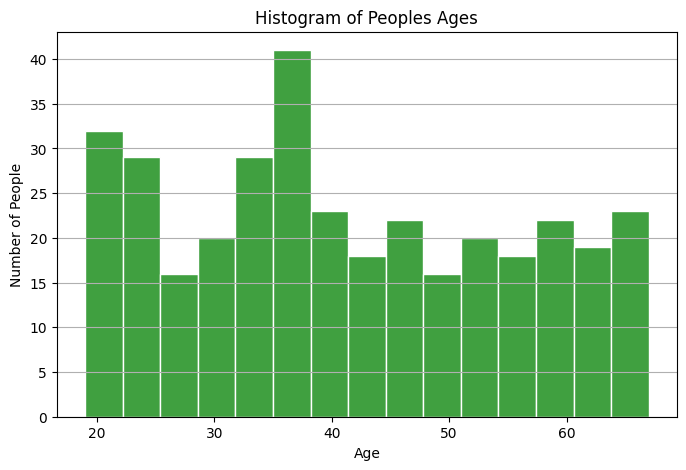

In [174]:
# using seaborn for better visualization
import seaborn as sb

plt.figure(figsize = (8, 5))
sb.histplot(profiles_df["Age"], bins = 15, kde = False, color = 'green', edgecolor = 'white')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Histogram of Peoples Ages')
plt.grid(axis = 'y')
plt.show()

In [175]:
# using .value_counts() to get counts
eye_counts = profiles_df['Eye_Color'].value_counts().reset_index()
eye_counts.columns = ['Eye_Color', 'Count']

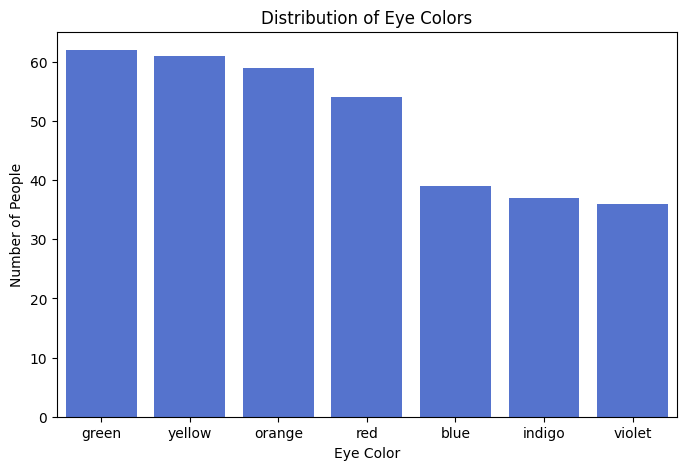

In [176]:
plt.figure(figsize=(8, 5))
sb.barplot(data=eye_counts, x='Eye_Color', y='Count' ,color = 'royalblue')
plt.xlabel('Eye Color')
plt.ylabel('Number of People')
plt.title("Distribution of Eye Colors")
plt.show()

**3.3 (2 points):** Make a cross-tab table of eye color vs hair color.

In [177]:
#using pandas crosstab function
eye_hair_crosstab = pd.crosstab(profiles_df['Eye_Color'], profiles_df['Hair_Color'])
eye_hair_crosstab

Hair_Color,blue,green,indigo,orange,red,violet,yellow
Eye_Color,,,,,,,
blue,1,8,1,7,8,8,6
green,19,11,2,5,10,11,4
indigo,8,6,8,10,3,1,1
orange,7,9,7,3,14,9,10
red,12,5,6,6,9,3,13
violet,4,5,4,8,7,1,7
yellow,9,1,15,11,6,11,8


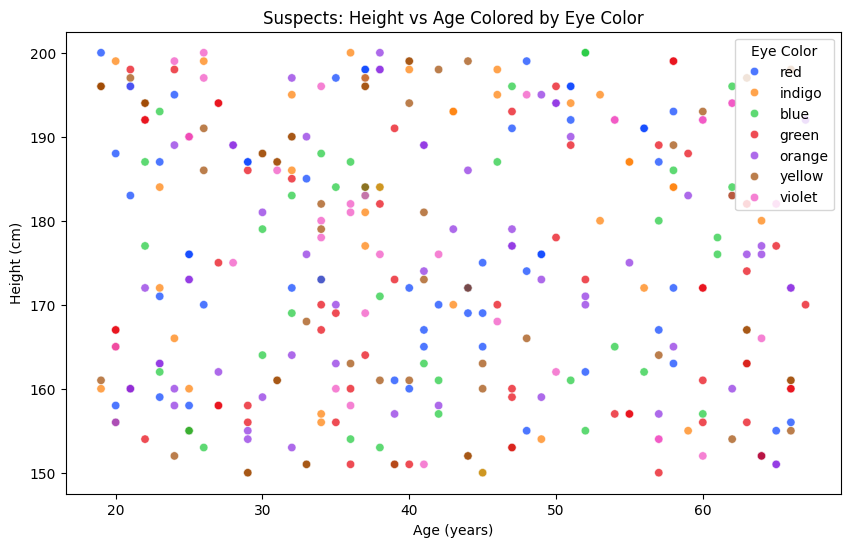

In [178]:
plt.figure(figsize=(10,6))
sb.scatterplot(data = profiles_df, x='Age', y='Height', hue='Eye_Color', palette='bright', alpha=0.7)
plt.title('Suspects: Height vs Age Colored by Eye Color')
plt.xlabel('Age (years)')
plt.ylabel('Height (cm)')
plt.legend(title='Eye Color')
plt.show()

I feel a valuable visualization for our criminal investigation task would be a scatter plot of
Height vs Age, colored by Eye Color. This chart helps us visually group suspects by key
physical traits (age and height), and adding eye color allows us to quickly cross-reference
with witness descriptions.


## 4. Figuring out the features of the culprit

Now that we have successfully cleaned our **Profiles** data and learned a bit more about it, we notice that all the other datasets are actually clean. Let's begin figuring out the features of the criminal from witness testimonies. Take a moment to look at the **"Witnesses"** table. We won't necessarily want all the statements from every single witness.


 Find all witnesses that were near the crime scene
- First load in the Witness.csv file and pass it to a variable called "**witness_df**"
- create a new dataframe called **"important_witnesses"** that contains the id and the witness statements of those who were near the scene of the crime
- display the new dataframe when you are finished



In [179]:
files.upload()

Saving Witness.csv to Witness (1).csv


{'Witness (1).csv': b'ID,Statement\r\nP122,I saw someone that looks to be 25 years old acting suspicious.\r\nP110,I saw someone that looks to be 23 years old acting suspicious.\r\nP184,I saw someone with indigo skin acting suspicious.\r\nP103,I saw someone with orange hair acting suspicious.\r\nP001,I saw someone with red hair acting suspicious.\r\nP164,I saw someone with blue skin acting suspicious.\r\nP283,I saw someone that looks to be 20 years old acting suspicious.\r\nP190,I saw someone with orange eyes acting suspicious.\r\nP240,I saw someone who looked 158 cm tall acting suspicious.\r\nP092,I saw someone with indigo hair acting suspicious.\r\nP071,I saw someone with violet eyes acting suspicious.\r\nP037,I saw someone with yellow eyes acting suspicious.\r\nP150,I saw someone with orange hair acting suspicious.\r\nP196,I saw someone who looked 158 cm tall acting suspicious.\r\nP149,I saw someone with indigo eyes acting suspicious.\r\nP180,I saw someone who looked 162 cm tall acti

In [180]:
witness_df = pd.read_csv('Witness.csv')
witness_df

,ID,Statement
0,P122,I saw someone that looks to be 25 years old ac...
1,P110,I saw someone that looks to be 23 years old ac...
2,P184,I saw someone with indigo skin acting suspicious.
3,P103,I saw someone with orange hair acting suspicious.
4,P001,I saw someone with red hair acting suspicious.
...,...,...
295,P123,I saw someone that looks to be 20 years old ac...
296,P121,I saw someone with orange eyes acting suspicious.
297,P238,I saw someone with yellow hair acting suspicious.
298,P145,I saw someone with orange eyes acting suspicious.


In [181]:
# taking witness who were on second floor and storing their IDs in second_floor_ids
second_floor_ids = profiles_df.loc[
    profiles_df['Location_during_crime'].notna() & profiles_df['Location_during_crime'].str.lower().str.contains('second floor'), 'ID'
]

# Extracting these witnesses statements
important_witnesses = witness_df[witness_df['ID'].isin(second_floor_ids)]
important_witnesses

,ID,Statement
12,P150,I saw someone with orange hair acting suspicious.
16,P075,I saw someone with orange hair acting suspicious.
20,P058,I saw someone with green eyes acting suspicious.
21,P157,I saw someone who looked 152 cm tall acting su...
36,P139,I saw someone who looked 150 cm tall acting su...
...,...,...
274,P015,I saw someone with orange hair acting suspicious.
279,P268,I saw someone that looks to be 21 years old ac...
285,P077,I saw someone with orange eyes acting suspicious.
286,P168,I saw someone with red skin acting suspicious.


 Based on the important witnesses' testimonies, find every potential eye color that the culprit could have.

 - Make a table called **"potential_eye_colors"** which should have potential eye colors and how many times each of them was mentioned in someone's statement. Display it when done.



In [182]:
# required  import statements
import re
from collections import Counter

In [183]:
eye_colors_list = profiles_df['Eye_Color'].dropna().unique().tolist()
eye_colors_list

['red', 'indigo', 'blue', 'green', 'orange', 'yellow', 'violet']

In [184]:
"""
Function to extract all eye colors mentioned in a statement.
Only counts colors that are explicitly mentioned as eyes.
for this im looking ahead of the colour mentioned and seeing if it matches eye or eyes
"""

def extract_eye_colors(statement):
    found = []
    statement_lower = statement.lower()
    for color in eye_colors_list:
        # Match only if color appears near "eye" or "eyes"
        if re.search(rf"\b{re.escape(color.lower())}\b(?=\s+eyes?)", statement_lower):
            found.append(color)
    return found

In [185]:
# Apply extraction to all important witnesses
eye_color_mentions = important_witnesses['Statement'].apply(extract_eye_colors)
eye_color_mentions.head()


,Statement
12,[]
16,[]
20,[green]
21,[]
36,[]


In [186]:
# Flatten the lists and count occurrences
eye_color_counts = Counter([color for mention_list in eye_color_mentions for color in mention_list])
eye_color_counts


Counter({'green': 3, 'orange': 5, 'blue': 2, 'violet': 1})

In [187]:
# building a table for this

potential_eye_colors = (
    pd.DataFrame(list(eye_color_counts.items()), columns=['Eye_Color', 'Count'])
    .sort_values('Count', ascending=False)
    .reset_index(drop=True)
)

potential_eye_colors


,Eye_Color,Count
0,orange,5
1,green,3
2,blue,2
3,violet,1


Find every potential hair color that the culprit could have

 - Make a table called **"potential_hair_colors"** which should have potential hair colors and how many times each of them was mentioned in someone's statement. Display it when done.

In [188]:
# similar to how we did with eyesdo with hair
hair_colors_list = profiles_df['Hair_Color'].dropna().unique().tolist()
hair_colors_list

['orange', 'green', 'violet', 'blue', 'red', 'indigo', 'yellow']

In [189]:
def extract_hair_colors(statement):
    found = []
    statement_lower = statement.lower()
    for color in hair_colors_list:
        # Match only if color appears near "hair"
        if re.search(rf"\b{re.escape(color.lower())}\b(?=\s+hair)", statement_lower):
            found.append(color)
    return found

In [190]:
hair_color_mentions = important_witnesses['Statement'].apply(extract_hair_colors)
hair_color_mentions.head()

,Statement
12,[orange]
16,[orange]
20,[]
21,[]
36,[]


In [191]:
hair_color_counts = Counter([color for mention_list in hair_color_mentions for color in mention_list])
hair_color_counts


Counter({'orange': 5, 'green': 6, 'blue': 2, 'violet': 3})

In [192]:
potential_hair_colors = (
    pd.DataFrame(list(hair_color_counts.items()), columns=['Hair_Color', 'Count'])
    .sort_values('Count', ascending=False)
    .reset_index(drop=True)
)

potential_hair_colors


,Hair_Color,Count
0,green,6
1,orange,5
2,violet,3
3,blue,2


 Find every potential skin color that the culprit could have

 - Make a table called **"potential_skin_colors"** which should have potential skin colors and how many times each of them was mentioned in someone's statement. Display it when done.

In [193]:
# similar to how I did for eye and hair colour doing for skin colour also

In [194]:
skin_colors_list = profiles_df['Skin_Color'].dropna().unique().tolist()
skin_colors_list

['indigo', 'red', 'blue', 'yellow', 'violet', 'orange', 'green']

In [195]:
def extract_skin_colors(statement):
    found = []
    statement_lower = statement.lower()
    for color in skin_colors_list:
        # Match only if color appears near "skin"
        if re.search(rf"\b{re.escape(color.lower())}\b(?=\s+skin)", statement_lower):
            found.append(color)
    return found

In [196]:
skin_color_mentions = important_witnesses['Statement'].apply(extract_skin_colors)
skin_color_mentions.head()

,Statement
12,[]
16,[]
20,[]
21,[]
36,[]


In [197]:
skin_color_counts = Counter([color for mention_list in skin_color_mentions for color in mention_list])
skin_color_counts


Counter({'orange': 3, 'red': 6, 'green': 1})

In [198]:
potential_skin_colors = (
    pd.DataFrame(list(skin_color_counts.items()), columns=['Skin_Color', 'Count'])
    .sort_values('Count', ascending=False)
    .reset_index(drop=True)
)

potential_skin_colors


,Skin_Color,Count
0,red,6
1,orange,3
2,green,1


 Find the potential height of the culprit

 - Put the smallest and largest potential heights of the culprit in the variables called **"smallest_height" & "largest_height"** and display them when you are done

In [199]:
# Function to extract heights in cm from a statement
"""
Extracting all numbers in the statement that likely represent height in cm.
Assuming heights are given in numbers followed by 'cm' or just numbers.
"""

def extract_heights(statement):
    statement_lower = statement.lower()
    # Match numbers possibly followed by 'cm'
    heights = re.findall(r'\b(\d{2,3})\s*cm?\b', statement_lower)
    # Convert to integers
    heights = [int(h) for h in heights]
    return heights

In [200]:
#Apply extraction to important witness statements
height_mentions = important_witnesses['Statement'].apply(extract_heights)

In [201]:
#Flatten the list of heights
all_heights = [h for sublist in height_mentions for h in sublist]
all_heights

[152, 150, 151, 151, 163, 170, 152, 155, 159, 158, 165, 170, 150, 164]

In [202]:
# Putting the smallest and largest potential heights of the culprit in the variables
# called "smallest_height" & "largest_height" and displaying them

smallest_height = min(all_heights) if all_heights else None
largest_height = max(all_heights) if all_heights else None

smallest_height, largest_height

(150, 170)

 Find the potential age of the culprit

 - Put the smallest and largest potential age of the culprit in the variables called **"smallest_age" & "largest_age"** and display them when you are done

In [203]:
# Function to extract potential ages from a statement
"""
Extracting all numbers in the statement that likely represent age.
Assuming ages are numbers between 1 and 120.

Im looking for only numbers between 1 and 100 and not checking if its
preceded by years old or not because the only other numerical entry in the peoples statements
is height and height value goes above hundred for all its entries
"""

def extract_ages(statement):
    statement_lower = statement.lower()
    # Find all numbers in the statement
    numbers = re.findall(r'\b(\d{1,2})\b', statement_lower)
    # Convert to integers
    ages = [int(n) for n in numbers if 1 <= int(n) < 100]
    return ages


In [204]:
age_mentions = important_witnesses['Statement'].apply(extract_ages)
age_mentions

,Statement
12,[]
16,[]
20,[]
21,[]
36,[]
...,...
274,[]
279,[21]
285,[]
286,[]


In [205]:
all_ages = [age for sublist in age_mentions for age in sublist]

smallest_age = min(all_ages) if all_ages else None
largest_age = max(all_ages) if all_ages else None

smallest_age, largest_age

(21, 35)

In [206]:
all_ages

[30, 23, 21, 22, 22, 21, 24, 23, 22, 35, 21]

## 5. Finding who might own the ticket

 Load **"Zichao_s Magic Show.csv"** into a dataframe called **"show_df"** display it when you are done.

In [207]:
files.upload()

Saving Zichao_s Magic Show.csv to Zichao_s Magic Show (1).csv


{'Zichao_s Magic Show (1).csv': b'ID,Ticket_Number\r\nP132,50269975\r\nP056,28120732\r\nP250,88051289\r\nP197,79545169\r\nP012,83521845\r\nP033,22058855\r\nP021,9473450\r\nP001,10116272\r\nP249,23524843\r\nP030,71886930\r\nP071,92962076\r\nP025,31002643\r\nP111,87338906\r\nP225,69020101\r\nP267,78443546\r\nP259,28602637\r\nP265,72721943\r\nP105,94251199\r\nP092,44345212\r\nP088,30175075\r\nP095,386818\r\nP239,92729414\r\nP242,42049173\r\nP176,99491312\r\nP133,1659823\r\nP189,47856259\r\nP200,10043610\r\nP159,54158103\r\nP178,8631845\r\nP300,56763889\r\nP138,43995703\r\nP223,23480518\r\nP023,45894659\r\nP183,44607251\r\nP029,63045332\r\nP136,3439786\r\nP114,84479148\r\nP052,44564514\r\nP160,47060216\r\nP166,66168819\r\nP031,94482194\r\nP224,57655493\r\nP011,79781555\r\nP226,1263570\r\nP192,10310889\r\nP038,34783723\r\nP284,42427144\r\nP282,96564203\r\nP098,48815710\r\nP298,37592884\r\nP051,56077968\r\nP256,7151664\r\nP185,62339971\r\nP203,43450497\r\nP067,74753690\r\nP018,72179022\r\nP1

In [208]:
show_df = pd.read_csv('Zichao_s Magic Show.csv')
show_df

,ID,Ticket_Number
0,P132,50269975
1,P056,28120732
2,P250,88051289
3,P197,79545169
4,P012,83521845
...,...,...
146,P121,31341288
147,P003,85008158
148,P180,24491860
149,P283,38524355



 Remember that there was a show ticket left at the crime scene, and it'd be helpful to know which tickets match the color of the ticket at the scene.

Create a column called **Ticket_Color** for the **"show_df"** that displays the colors of each ticket based on its Ticket ID.

How do you find the ticket color from the ticket number to populate the new column? **You asked the ticket issuer and learned the rule**: Sum the individual digits in a ticket number, then look at the rightmost digit and use this mapping: 0-2:B, 3-5:R, 6-7:G, 8-9:Y.



In [209]:
# Function to determine ticket color from Ticket ID
def get_ticket_color(ticket_id):
    # Converting ticket ID to string and sum its digits
    digit_sum = sum(int(d) for d in str(ticket_id))
    # Taking the rightmost digit of the sum
    rightmost_digit = digit_sum % 10
    # Mapping rightmost digit to color
    if 0 <= rightmost_digit <= 2:
        return 'B'
    elif 3 <= rightmost_digit <= 5:
        return 'R'
    elif 6 <= rightmost_digit <= 7:
        return 'G'
    elif 8 <= rightmost_digit <= 9:
        return 'Y'

In [210]:
# Apply the function to create a new column
show_df['Ticket_Color'] = show_df['Ticket_Number'].apply(get_ticket_color)
show_df

,ID,Ticket_Number,Ticket_Color
0,P132,50269975,R
1,P056,28120732,R
2,P250,88051289,B
3,P197,79545169,G
4,P012,83521845,G
...,...,...,...
146,P121,31341288,B
147,P003,85008158,R
148,P180,24491860,R
149,P283,38524355,R


 Using all the data compiled from before find a person in **Profiles** that matches all the features you've discovered. Put the name of the culprit in a variable called **"culprit"**



In [211]:
# Merge show_df into profiles_df to get Ticket_Color information
profiles_df = profiles_df.merge(show_df[['ID', 'Ticket_Color']], on='ID', how='left')

# Suppose the ticket color found at the scene is stored in this variable
scene_ticket_color = 'R'  # Replace with the actual ticket color at the scene

# Filter profiles based on all known features
possible_culprits = profiles_df[
    (profiles_df['Eye_Color'].isin(potential_eye_colors['Eye_Color'])) &
    (profiles_df['Hair_Color'].isin(potential_hair_colors['Hair_Color'])) &
    (profiles_df['Skin_Color'].isin(potential_skin_colors['Skin_Color'])) &
    (profiles_df['Height'] >= smallest_height) & (profiles_df['Height'] <= largest_height) &
    (profiles_df['Age'] >= smallest_age) & (profiles_df['Age'] <= largest_age) &
    (profiles_df['Ticket_Color'] == scene_ticket_color)
]

In [212]:
# Get the name of the culprit
culprit = possible_culprits.iloc[0]['Name'] if not possible_culprits.empty else None
culprit


'Ishan Kar'


1) Eye, hair, skin colors are filtered using the lists of potential traits derived from witnesses.

2) Height and age are filtered using the smallest and largest potential values.

3) Ticket color is matched exactly to the color of the ticket found at the crime scene.

4) here .iloc[0] selects the first matching profile.

5) The variable culprit now contains the name of the suspect.

6) This approach ensures the culprit matches all pieces of evidence collected.



 Check if your culprit is correct!

Once you've identified one name, you can interrogate them. What they would say can be located next to their name in **"Interrogation_Statement.csv"**.

Load the dataset into **"interrogation_df"** and print the statement associated with the name you've identified below.

In [213]:
files.upload()

Saving Interrogation_Statements.csv to Interrogation_Statements (2).csv


{'Interrogation_Statements (2).csv': b'Name,Statement\r\nJennifer Mccoy,"Stealing? That\'s not in my nature at all. I respect everyone\'s property, especially Dr. Fardina\'s."\r\nKarina Gray,"Stealing? That\'s not in my nature at all. I respect everyone\'s property, especially Dr. Fardina\'s."\r\nCraig Espinoza,I was busy with my project presentation in another building. I didn\'t even step into Dr. Fardina\'s room.\r\nMichael Mendez,I had back-to-back exams that day. Stealing Dr. Fardina\'s marker would be the last thing on my mind!\r\nTara Thompson,I wasn\'t even on campus that day. Check the attendance logs; you won\'t find my name.\r\nWilliam Montgomery,I had back-to-back exams that day. Stealing Dr. Fardina\'s marker would be the last thing on my mind!\r\nScott Harris,I wasn\'t even on campus that day. Check the attendance logs; you won\'t find my name.\r\nCheryl Thomas,I had back-to-back exams that day. Stealing Dr. Fardina\'s marker would be the last thing on my mind!\r\nTrevor 

In [214]:
# Load the interrogation statements dataset
interrogation_df = pd.read_csv("Interrogation_Statements.csv")

# Find the statement for the identified culprit
culprit_statement = interrogation_df.loc[interrogation_df['Name'] == culprit, 'Statement'].values

# Display the statement
culprit_statement[0] if len(culprit_statement) > 0 else None


"Fardina's Markers were just too dang cool :( I saw them and I knew I had to have them. >:( arrest me"